# How does a sports team's performance affect their popularity?

## Region and Domain
Ann Arbor, Michigan, United States<br>
Sports and Athletics

## Research Question
We're gonna look at the four professional Detroit sports teams (The Detroit Pistons, The Red
Wings, The Detroit Tigers, and The Detroit Lions) and how have their win percentages affected their popularity. We're gonna be using the number of searches on Google as a metric for the team's popularity.

## Cleaning the data

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib notebook

### Cleaning Red Wings data

In [88]:
# Dealing with win%
red_wings_record = pd.read_csv('Data/Detroit Red Wings Record.csv')
# with red wings we'll start with 2005-06 season, because 2004-05 was canceled
red_wings_record = red_wings_record[79:-3][['NHL season', 'W', 'L']]
red_wings_record.rename(columns={'NHL season' : 'Season'}, inplace=True)
red_wings_record['Win%'] = pd.to_numeric(red_wings_record['W'])/\
                            (pd.to_numeric(red_wings_record['W']) + pd.to_numeric(red_wings_record['L']))*100

red_wings_record.loc[:, 'Season']= red_wings_record['Season'].apply(lambda x: int(x[0:4]) + 1)
red_wings_record = red_wings_record.drop(['W', 'L'], axis=1).set_index('Season')

# Dealing with popularity
red_wings_popularity = pd.read_csv('Data/Detroit Red Wings Popularity.csv')
red_wings_popularity['Season'] = red_wings_popularity.index.map(lambda x: int(x[:4]) if (int(x[5:]) < 10) else int(x[:4])+1)
red_wings_popularity = red_wings_popularity.groupby('Season').mean()

red_wings = pd.merge(red_wings_popularity, red_wings_record, how='inner', left_index=True, right_index=True)

### Cleaning Detroit Pistons data

In [89]:
# Dealing with win%
pistons_record = pd.read_csv('Data/Detroit Pistons Record.csv')

# We only have data from Google from 2004, so we'll get rid of everything before that
pistons_record = pistons_record[['NBA Season', 'Win%']][57:-2]
pistons_record.rename(columns={'NBA Season' : 'Season'}, inplace=True)
# We'll restrict the season to one year when most games are played for convenience's sake
pistons_record.loc[:, 'Season']= pistons_record['Season'].apply(lambda x: int(x[0:4]) + 1)
pistons_record.loc[:, 'Win%'] = pd.to_numeric(pistons_record['Win%']) * 100
pistons_record.set_index('Season', inplace=True)

# Dealing with popularity
pistons_popularity = pd.read_csv('Data/Detroit Pistons Searches.csv')
# Most seasons start around october, so, since we're restricting seasons to one year,
# we'll send the data after october to the next year season
pistons_popularity['Season'] = pistons_popularity.index.map(lambda x: int(x[:4]) if (int(x[5:]) < 10) else int(x[:4])+1)
pistons_popularity = pistons_popularity.groupby('Season').mean()

pistons = pd.merge(pistons_popularity, pistons_record, how='inner', left_index=True, right_index=True)

### Cleaning Detroit Tigers data

In [90]:
# Dealing with win%
tigers_record = pd.read_csv('Data/Detroit Tigers Record.csv')
tigers_record = tigers_record[tigers_record['Season'] >= 2004][['Season', 'Win%']]
tigers_record.set_index('Season', inplace=True)
tigers_record['Win%'] *= 100

# Dealing with popularity
tigers_popularity = pd.read_csv('Data/Detroit Tigers Searches.csv')
tigers_popularity['Season'] =  tigers_popularity.index.map(lambda x: int(x[:4]))
tigers_popularity = tigers_popularity.groupby('Season').mean()

tigers = pd.merge(tigers_popularity, tigers_record, how='inner', left_index=True, right_index=True)

### Cleaning Detroit Lions data

In [91]:
# Dealing with win%
lions_record = pd.read_csv('Data/Detroit Lions Record.csv')
lions_record = lions_record[76:-3][['NFL season', 'Wins', 'Losses']]

lions_record.rename(columns={'NFL season' : 'Season'}, inplace=True)
lions_record['Season'] = pd.to_numeric(lions_record['Season'])
lions_record['Win%'] = pd.to_numeric(lions_record['Wins'])/\
                            (pd.to_numeric(lions_record['Wins']) + pd.to_numeric(lions_record['Losses']))*100

lions_record = lions_record.drop(['Wins', 'Losses'], axis=1).set_index('Season')

# Dealing with popularity
lions_popularity = pd.read_csv('Data/Detroit Lions Popularity.csv')
lions_popularity['Season'] =  lions_popularity.index.map(lambda x: int(x[:4]))
lions_popularity = lions_popularity.groupby('Season').mean()

lions = pd.merge(lions_popularity, lions_record, how='inner', left_index=True, right_index=True)

## Creating plots

<IPython.core.display.Javascript object>


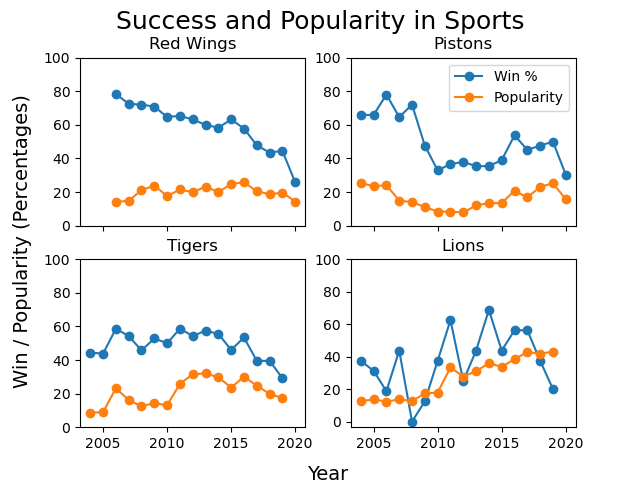

Text(0.02, 0.2, 'Win / Popularity (Percentages)')

In [94]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

teams = [red_wings, pistons, tigers, lions]
team_names = ['Red Wings', 'Pistons', 'Tigers', 'Lions']
axes = [ax1, ax2, ax3, ax4]

for team, name, ax in zip(teams, team_names, axes):
    ax.plot(team.index, team['Win%'], '-o');
    ax.plot(team.index, team['Popularity'], '-o');
    ax.set_title(name)
    ax.set_yticks(range(0, 101, 20))

ax2.legend(['Win %', 'Popularity'], loc = 'upper right')
fig.suptitle('Success and Popularity in Sports', fontsize=18, )
fig.text(0.48, 0, 'Year', fontsize=14)
fig.text(0.02, 0.2, 'Win / Popularity (Percentages)', fontsize=14, rotation=90)


## Let's look at correlation coefficients

<IPython.core.display.Javascript object>


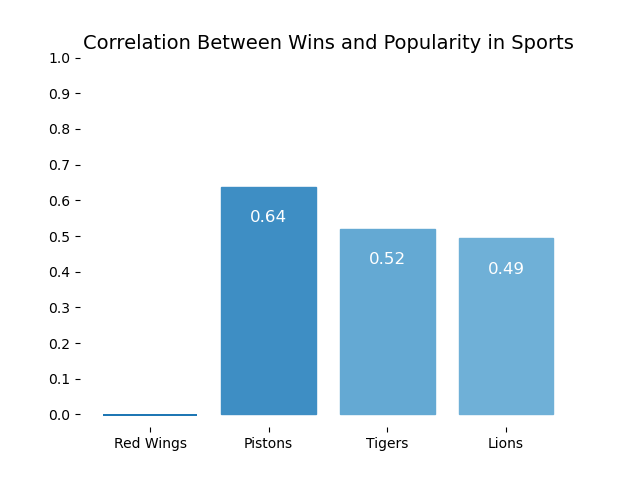

In [96]:
# Since we don't know anything about normality of the data distribution, we're gonna use Spearman's coefficient.
corr_coefs = list(map(lambda x: x.corr('spearman').iloc[0,1], teams))

# Let's draw a bar plot
fig = plt.figure()

# create colors and gradient
color_map = cm.ScalarMappable(colors.Normalize(0,1), cm.get_cmap('Blues'))
color_map.set_array([])

bars = plt.bar(team_names, corr_coefs)
plt.title('Correlation Between Wins and Popularity in Sports', fontsize=14)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
for bar in bars[1:]:
    height = round(bar.get_height(), 2)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.1, str(height), 
                 ha='center', color='w', fontsize=12)
    bar.set_color(color_map.to_rgba(height))

## Conclusion

<p>The question we stated, in the beginning, was whether sports teams' performance, measured by win percentages, correlated with their popularity, measured by Google searches for the team’s name.</p>

<p>We can see in the visualization “Success and Popularity in Sport” that, in fact, there does appear to be some correlation for the three of four teams. The “Red Wings” is the only team whose popularity doesn’t seem to depend at all on their performance, and, in fact, mostly stays steady for the whole period. This, perhaps, can be explained by a more loyal fanbase.</p>

<p>This is further proven by the second visualization “Correlation Between Wins and Popularity in Sport”, where we calculated and displayed Spearman’s correlation coefficients for teams’ win percentages and theid popularity. We can see that all teams  have a coefficient around 0.5 or higher (except “Red Wings”, whose coefficient is very close to 0), thus, proving that, in most cases, there is correlation between team’s performance and their popularity.</p>

## Citations
All of the data comes from the following resources: <br>
<ul>
    <li>https://en.wikipedia.org/wiki/List_of_Detroit_Pistons_seasons</li>
    <li>https://en.wikipedia.org/wiki/List_of_Detroit_Red_Wings_seasons</li>
    <li>https://en.wikipedia.org/wiki/List_of_Detroit_Tigers_seasons</li>
    <li>https://en.wikipedia.org/wiki/List_of_Detroit_Lions_seasons</li>
    <li>https://trends.google.com/trends</li>
</ul>